# Numerical Computing with Python
# Lecture 1: NumPy and SciPy
### Ramses van Zon and Alexey Fedoseev
#### SciNet HPC Consortium, University of Toronto
####  November 7, 2019

In [1]:
%%html
<style> h1, h2 { color: #2a7bbd ! important; } h1 { font-size: 2.5em !important; }  </style>

In [ ]:
%matplotlib inline

## Python lists are not ideal for numerical arrays

For numerical work, the python-native lists aren't the ideal data type.

Lists can do funny things that you don't expect, if you're not
careful.

  * Lists are just a collection of items, of any type.
  * If you do mathematical operations on a list, you won't get
    what you expect.
  * These are not the ideal data type for scientific computing.
  * ****Arrays**** are a much better choice, but are not a native
    Python data type.

In [ ]:
a = [1, 2, 3, 4]
a

In [ ]:
b = [3, 5, 5, 6]
b

In [ ]:
2 * a

In [ ]:
a + b

## Lists vs. Arrays

**Lists**: optimized for flexibility

  * Can hold any type
  * Can grow
  * Are one-dimensional
  * Do not have out-of-the-box element-wise operations

**Arrays**: optimized for speed

  * Single type
  * Fixed size
  * Multi-dimensional
  * Have optimized element-wise operations

## Arrays are what we want to use: Numpy

Almost everything that you want to do starts with NumPy.

  * Contains arrays of various types and forms: zeros, ones,
    linspace, *etc.*
  * linspace takes 2 or 3 arguments, the default number of
    entries is 50.

In [ ]:
import numpy

In [ ]:
numpy.zeros(5)

In [ ]:
numpy.ones(5, dtype = int)

In [ ]:
numpy.zeros([2,2])

In [ ]:
numpy.arange(5)

In [ ]:
numpy.linspace(1,5)

In [ ]:
numpy.linspace(1, 5, 6)

## Specifying data types

In [ ]:
x = numpy.float32(7.4e-3)
a = numpy.array([[1,2,3],[4,5,6]],dtype=numpy.float32)
a

In [ ]:
b = numpy.ndarray((2,3),dtype=numpy.float16)
b

  * Integers:    
    `int8 int16 int32` `int64` `uint8 uint16 uint32 uint64`    
    Number indicates number of bits.
  * Floats of half, single and double precision:  `float16 float32` `float64`
  * Complex numbers in single and double precision: `complex64` `complex128`

## Accessing array elements
  
Elements of arrays are accessed using square brackets.

  * Like most languages, the first index is the row, the second is the
    column.

  * Indexing starts at 0.

  * You cannot assign values outside the index range (unlike e.g. in  R).

*Note: `import numpy as np` renames the `numpy` module to the shorter `np`.*

In [3]:
import numpy as np  
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
a = np.zeros([2,3])
a[1,2] = 1
a[0,1] = 2
a

In [ ]:
a[2,1] = 1

## Slicing arrays

You can select a subset of an numpy array by using an **index range** instead of a single number between square brackets. This is called **slicing**.

  * An index range looks like "a:b",  e.g. "2:4". So `a[2:4]` selects those elements of an array `a`.

  * Read "2:4" as "from the beginning of the element at index 2, to
    the beginning of that at index 4".

  * Or read it as: index 2 is the first you get, index 4 is the first you do not get.
  
  * Negative indexing is supported.
  * If a third index is specified, it refers to the step size
    ("1:10:2", for example).
  * If no index is specifed, either "beginning" or "end" is
    assumed.
      

In [4]:
a = np.array([1,2,3,4,5,6,7])
print(a[2])

3


In [ ]:
print(a[2:4])

In [6]:
print(a[::3])

[1 4 7]


Elements in an array can also be selected using a boolean array.  Boolean arrays can be created using a conditional expression.

In [ ]:
a = np.arange(5)
a

In [ ]:
a > 2

In [ ]:
a[a > 2]

In [ ]:
a[(a % 2) == 0]

Note: The "%" symbol is the modulus operator.

# Copying arrays

Use caution when copying array variables.  There's a 'sharing feature'
here that is unexpected.

In [ ]:
a = 10
b = a
a = 20
a, b

In [ ]:
a = np.array([[1,2,3],[2,3,4]])
b = a
a[1,0] = -10
a

In [ ]:
b

To turn off this 'sharing feature', use `copy`

In [ ]:
b = a.copy()
a[1,0] = 16
a

In [ ]:
b

# Matrix arithmetic

## Looping over arrays
  
  * In Python, loops over arrays are performed over the first
    index.

  * To go over all elements of a multidimensional array `a` without using nested loops, use
    `a.ravel()` or `a.flat` 

    (or `a.flatten()` if you need a copy).

In [ ]:
a = np.array([1,2,3])
for i in a:
    print("element:", i)

In [ ]:
a = np.array([[1,2],[3,4]])
for i in a: 
    print("element:", i)

In [ ]:
for i in a.ravel(): 
    print("element:", i)

## Shape and reshape
   
  * NumPy allows you to modify the shape of an array once it
    already exists.

  * Though, of course, you can only change the shape to one which
    contains the same number of elements.

  * Also, note that `reshape` creates a new view of the
    array data, and doesn't change the shape of the original array.

In [ ]:
a = np.arange(8)
a.shape

In [ ]:
a.reshape([2,4])

In [ ]:
a.reshape([2,4]).shape

In [ ]:
a.reshape([2,3])

## Vector-vector & vector-scalar multiplication
   
1-D arrays are often called 'vectors'.

  * When vectors are multiplied you get element-by-element
    multiplication.
  * When vectors are multiplied by a scalar, you
    also get element-wise multiplication.

In [ ]:
a = np.arange(4)
a

In [ ]:
b = np.arange(4.) + 3
b

In [ ]:
c = 2
c

In [ ]:
a * b

In [ ]:
a * c

In [ ]:
b * c

## Peculiar matrix-vector multiplication

A 2-D array is sometimes called a 'matrix'.

  * Matrix-scalar multiplication gives element-wise
    multiplication.
  * Matrix-vector multiplication DOES NOT give the
    standard result!

In [ ]:
a = np.array([[1,2,3],[2,3,4]])
b = np.array([1, 2, 3])
a * b

Normal matrix-vector multiplication:
$$
\begin{bmatrix}
  a_{11} & a_{12} & a_{13}  \\
  a_{21} & a_{22} & a_{23}
\end{bmatrix} \cdot
\begin{bmatrix}
  b_1  \\
  b_2  \\
  b_3 
\end{bmatrix}
=
\begin{bmatrix}
  a_{11} \cdot b_1 + a_{12} \cdot b_2 +  a_{13} \cdot b_3\\
  a_{21} \cdot b_1 + a_{22} \cdot b_2 +  a_{23} \cdot b_3
\end{bmatrix}
$$

Python matrix-vector multiplication:
$$
\begin{bmatrix}
  a_{11} & a_{12} & a_{13}  \\
  a_{21} & a_{22} & a_{23}
\end{bmatrix} \cdot
\begin{bmatrix}
  b_1  \\
  b_2  \\
  b_3 
\end{bmatrix}
=
\begin{bmatrix}
  a_{11} \cdot b_1 & a_{12} \cdot b_2 &  a_{13} \cdot b_3\\
  a_{21} \cdot b_1 & a_{22} \cdot b_2 &  a_{23} \cdot b_3
\end{bmatrix}
$$

## Vector broadcasting

This peculiar multiplication is result of element-wise operations plus **broadcasting**.

Python will perform vector broadcasting if you perform a matrix-vector operation:
      
  * Python will repeatedly apply the vector to the matrix.
  * Python will not do this with vector-vector operations.
  * The length of the vector must equal the last dimension of the matrix.
  * By default it will do the application by row; use
    'np.newaxis' to reshape the vector.

In [ ]:
a = np.zeros([2,3])
a + np.arange(3)

In [ ]:
a + np.arange(2)

In [ ]:
a + np.arange(2)[:,np.newaxis]

## Broadcasting rules

Dimensions are stretched if they are ``compatible''.

Start with the trailing dimensions, and move to the left.

If the dimensions are equal, or one of them is 1, or one is missing, they are compatible.

![](array-broadcasting.png)


## Matrix-matrix multiplication
   
Not surprisingly, matrix-matrix multiplication doesn't work as
expected either, instead doing an element-wise multiplication like
with vector-vector multiplication.

In [ ]:
a = np.array([[1,2,3],[2,3,4]])
b = np.array([[1,2,3],[2,3,4]])
a

In [ ]:
a * b

Normal matrix-matrix multiplication:

$$
  \begin{bmatrix} 
      a_{11} & a_{12} \\
      a_{21} & a_{22}
  \end{bmatrix} \cdot 
  \begin{bmatrix} 
    b_{11} & b_{12} \\
    b_{21} & b_{22} 
  \end{bmatrix}
  = 
  \begin{bmatrix} 
      a_{11} \cdot b_{11} + a_{12} \cdot b_{21} &  a_{11} \cdot b_{12} + a_{12} \cdot b_{22}\\
      a_{21} \cdot b_{11} + a_{22} \cdot b_{21} &  a_{21} \cdot b_{12} + a_{22} \cdot b_{22}
    \end{bmatrix}
$$

Python matrix-vector multiplication:

$$
  \begin{bmatrix} 
      a_{11} & a_{12} \\
      a_{21} & a_{22}
  \end{bmatrix} \cdot 
  \begin{bmatrix} 
    b_{11} & b_{12} \\
    b_{21} & b_{22} 
  \end{bmatrix}
  = 
  \begin{bmatrix} 
      a_{11} \cdot b_{11} &  a_{12} \cdot b_{12}\\
      a_{21} \cdot b_{21} &  a_{22} \cdot b_{22}
    \end{bmatrix}
$$

## How then to perform matrix algebra?
  
Since Python 3.5, the standard way is to use numpy arrays in conjuction with the @ product operator.
Alternatively, you can use the dot function from SciPy.

In [7]:
import scipy as sp
a = np.array([[1,2,3],[2,3,4]])
b = np.array([[1,2,3],[2,3,4]])
a

array([[1, 2, 3],
       [2, 3, 4]])

In [ ]:
a.T  # or a.transpose()

In [8]:
a.T @ b  # or: sp.dot(a.T, b)

array([[ 5,  8, 11],
       [ 8, 13, 18],
       [11, 18, 25]])

In [ ]:
b @ a.T  # or: sp.dot(b, a.T)

In [ ]:
c = np.arange(3) + 1
a @ c # or: sp.dot(a,c)

# Linalg Submodule of SciPy
  
The linalg submodule of SciPy contains useful functions for matrix algebra.

  * Typical matrix functions: inv, det, norm...
  * More advanced functions: eig, SVD, cholesky...
  * Both NumPy and SciPy have a linalg module.  Use SciPy,
    because it is compiled with optimized BLAS/LAPACK support.

In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg 
a = np.array([[1,2,3], [3,4,5], [1,1,2]])
linalg.det(a)

In [ ]:
a @ linalg.inv(a)

## Solving systems of equations


The linalg submodule of scipy comes with an important function: solve.
      
linalg.solve is used to solve the system of equations $Ax = b$.

In [ ]:
a = np.array([[1,2,3], [3,4,5], [1,1,2]])
a

In [ ]:
b = np.array([3, 4, 2])
b

In [ ]:
x = linalg.solve(a, b)
x

Here 
$$
  \begin{bmatrix} 
    1 & 2 & 3\\  
    3 & 4 & 5  \\
    1 & 1 & 2\\
\end{bmatrix} \cdot
\begin{bmatrix} 
x[0]  \\
x[1]  \\
x[2]
\end{bmatrix}
=
\begin{bmatrix} 
3\\
4\\
2
\end{bmatrix}
$$

is solved by

$$
  \begin{bmatrix} 
    1 & 2 & 3\\  
    3 & 4 & 5  \\
    1 & 1 & 2\\
\end{bmatrix} \cdot
\begin{bmatrix} 
-0.5  \\
-0.5  \\
1.5
\end{bmatrix}
=
\begin{bmatrix} 
3\\
4\\
2
\end{bmatrix}
$$

# Statistics

SciPy contains all of the statistical functions that you'll
probably ever need.
  
  * The scipy.stats module is based around the idea of a 'random
    variable' type.
    
  * A whole variety of standard distributions are available:
    
      * Continuous distributions: Normal, Maxwell, Cauchy,
        Chi-squared, Gumbel Left-scewed, Gilbrat, Nakagami, ...
      * Discrete distributions: Poisson, Binomial,
        Geometric, Bernoulli, ...
    
  * The random variables have all of the statistical
    properties of the distributions built into them already: cdf,
    pdf, mean, variance, moments, ...

## Normal statistics

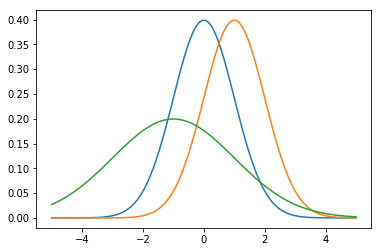

In [10]:
import numpy as np, scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
x = np.linspace(-5, 5, 100)
plt.plot(x,stats.norm.pdf(x))
plt.plot(x,stats.norm.pdf(x,loc=1))
plt.plot(x,stats.norm.pdf(x,loc=-1,scale=2));

All continuous distributions take `loc` and `scale` as keyword
parameters to adjust the location and scale of the distribution.
In general the distribution of a random variable `X` is obtained
from `(X - loc) / scale`.  The default values are `loc = 0` and
`scale = 1`.

## More normal statistics

In [ ]:
stats.norm.mean(loc = -1, scale = 2)

In [ ]:
stats.norm.std(loc = -1, scale = 2)

In [ ]:
stats.norm.moment(3, loc = -1, scale = 2)

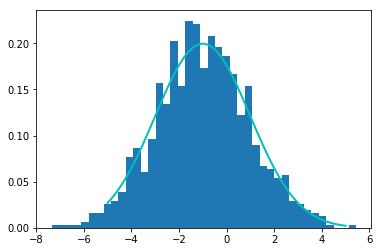

In [11]:
samples = stats.norm.rvs(size = 1000, loc = -1, scale = 2)
plt.hist(samples, bins=41, density=True)
plt.plot(x, stats.norm.pdf(x, loc = -1, scale = 2), 'c', linewidth = 2);

## Setting the seed
 
Sometimes you need consistency in your randomness:
       
  * Pseudo-random numbers are generated from an initial
    'seed'.
  * This seed generates the first number, which is then used
    as the seed for the second number.
  * If you need consistency in your random numbers (for
    debugging, for example), you can set the seed explicitly so
    that you get the same random numbers every time.
  * Be careful using this for production!

In [ ]:
stats.norm.rvs()

In [ ]:
stats.norm.rvs()

In [ ]:
np.random.seed(1)
stats.norm.rvs()

In [ ]:
sp.random.seed(1)
stats.norm.rvs()

In [ ]:
import random as rd
rd.seed(1)
stats.norm.rvs()

## Random versus numpy.random
  
You may notice that there are several random packages: `random`,
`numpy.random` and `scipy.random`.  What's the difference?
    
  * scipy.random and numpy.random are the same.
  * The `random` package is not connected to the others.
  * The numpy.random package affects numpy and scipy
    routines; the `random` package does not.
  * All use the same algorithm (Mersenne Twister).
  * The `random.seed()` is thread safe, while numpy's and scipy's `random.seed()`
    are not.
  * The `numpy.random` package contains more functionality.
  * Unless you need your code to be thread-safe (rarely in python), use
    `numpy.random`.

## Statistics, a discrete example: Poisson 

In [ ]:
x = np.arange(10)
plt.plot(x, stats.poisson.pmf(x, 4),'o-')
plt.plot(x, stats.poisson.cdf(x, 4))

In [ ]:
stats.poisson.mean(4)

In [ ]:
stats.poisson.var(4)

Note that discrete distributions have Probability Mass Functions
(PMF) instead of Probability Density Functions (PDF).

## Polynomial fitting

In [12]:
x = np.arange(50.)
y = x + 50.0 * np.random.random(50)

fit = np.polyfit(x, y, 1)
fit

array([ 0.86205106, 26.30050891])

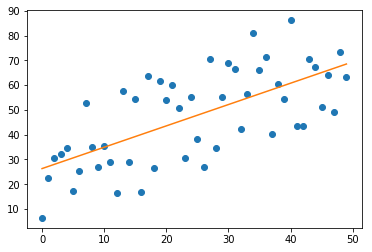

In [13]:
plt.plot(x, y, 'o')  
plt.plot(x, np.polyval(fit, x));

In [14]:
fit = np.polyfit(x, y, 2)

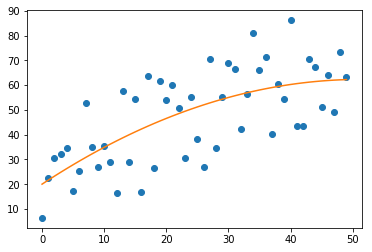

In [15]:
plt.plot(x, y, 'o')  
plt.plot(x, np.polyval(fit, x));

## Further numerical functionality in SciPy

There is a lot functionality more in SciPy and its subpackages, e.g.:

 * optimization
 
 * (even more) linear algebra
 
 * integration
 
 * interpolation
 
 * special functions
 
 * fast fourier transforms
 
 * signal and image processing
 
 * solvers for ordinary differential equations.
 
 * ...

# Assignment 1 

 1. Write a script to find a rough approximation to the **location of the minimum** of the function
    $$y(x) = x -  \frac{15 x}{1+x}$$
    
    by computing the values of the function for $N=10$ evenly spaced
    values of $x$ between 0 and 10, and determining the $x$ value
    corresponding to the minimum $y$.

    Next, the script should successively increase the number of evenly
    spaced $x$-values between 0 and 10, taking $N=10^2$, $10^3$,
    $10^4$, $10^5$ and $10^6$.

    The script should print the $x$ value of the minimum and its accuracy
    for each $N$.

 2. Find a better way to do this using SciPy. Check the accuracy.

In [63]:
# importing the libraries
import numpy as np
import scipy as sp

# creating list of the number of spacings, N for different runs
space = [10, 100, 1000, 10000, 100000, 1000000]

# finding y for each x and the printing the x corresponding to minimum y for each case

# running the loop for each spacings given 
for N in space:
    
    # creating x wiht N equally spaced points
    x=np.linspace(0., 10., N)
    
    # determining y corresponding to each x
    y=x-15*x/(1+x)
    
    # printing out the N and x for minimum y
    print(" The minimum with ",N, " divisions in x, for x = ", x[(y-(np.min(y)))<10e-16], "\n")


 The minimum with  10  divisions in x, for x =  [3.33333333] 

 The minimum with  100  divisions in x, for x =  [2.82828283] 

 The minimum with  1000  divisions in x, for x =  [2.87287287] 

 The minimum with  10000  divisions in x, for x =  [2.87328733] 

 The minimum with  100000  divisions in x, for x =  [2.87302873] 

 The minimum with  1000000  divisions in x, for x =  [2.87298287] 



In [53]:

def f(x):
    return (x-15*x/(1+x))

root=sp.optimize.newton(f, 1.5)
print(root)

14.0


In [61]:
# defining the function given with x as the only variable
# since x is the only variable I have used the scalar minimization in optimize library in SciPy
# the results differed when using Brent and Bounded methods in the 8th decimal point

def f(x):
    return (x-15*x/(1+x))

# finding the x for minimum value of f using the Brent method 
root=sp.optimize.minimize_scalar(f)
print("The minimum calculated using the Brent method for Scalar Minimization is ",root.x, "\n")

     fun: -8.254033307585168
    nfev: 17
     nit: 11
 success: True
       x: 2.872983345588738


In [60]:
def f(x):
    return (x-15*x/(1+x))

root=sp.optimize.minimize_scalar(f, bounds=(0.0, 10.0), method='bounded')
print("The minimum calculated using the Bounded method for Scalar Minimization is "root.x, "\n")

# on comparing: That calculated using the SciPy library with those calculated by finding done earlier
# the results in earlier part differs to the actual value 2.87298334621 after the third decimal digit
# that calculated using SciPy library is same till 8th digit, hence much higher in accuracy 

     fun: -8.254033307585168
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 2.8729833285671402


In [65]:
-1+np.sqrt(15)

2.872983346207417